# Кластеризация. Метод ближайших соседей (KNN)

## Что мы изучим на этом занятии

* Кластеризация
    * Что такое кластеризация?
    * K-means
* Метод ближайших соседей (KNN)

## Кластеризация

### Что такое кластеризация?

Кластеризация — это метод анализа данных, с помощью которого объекты делятся на группы (**кластеры**) таким образом, что объекты в одной группе больше похожи друг на друга, чем на объекты в других группах. Это процесс, который помогает структурировать данные, выявляя в них скрытые структуры или закономерности.

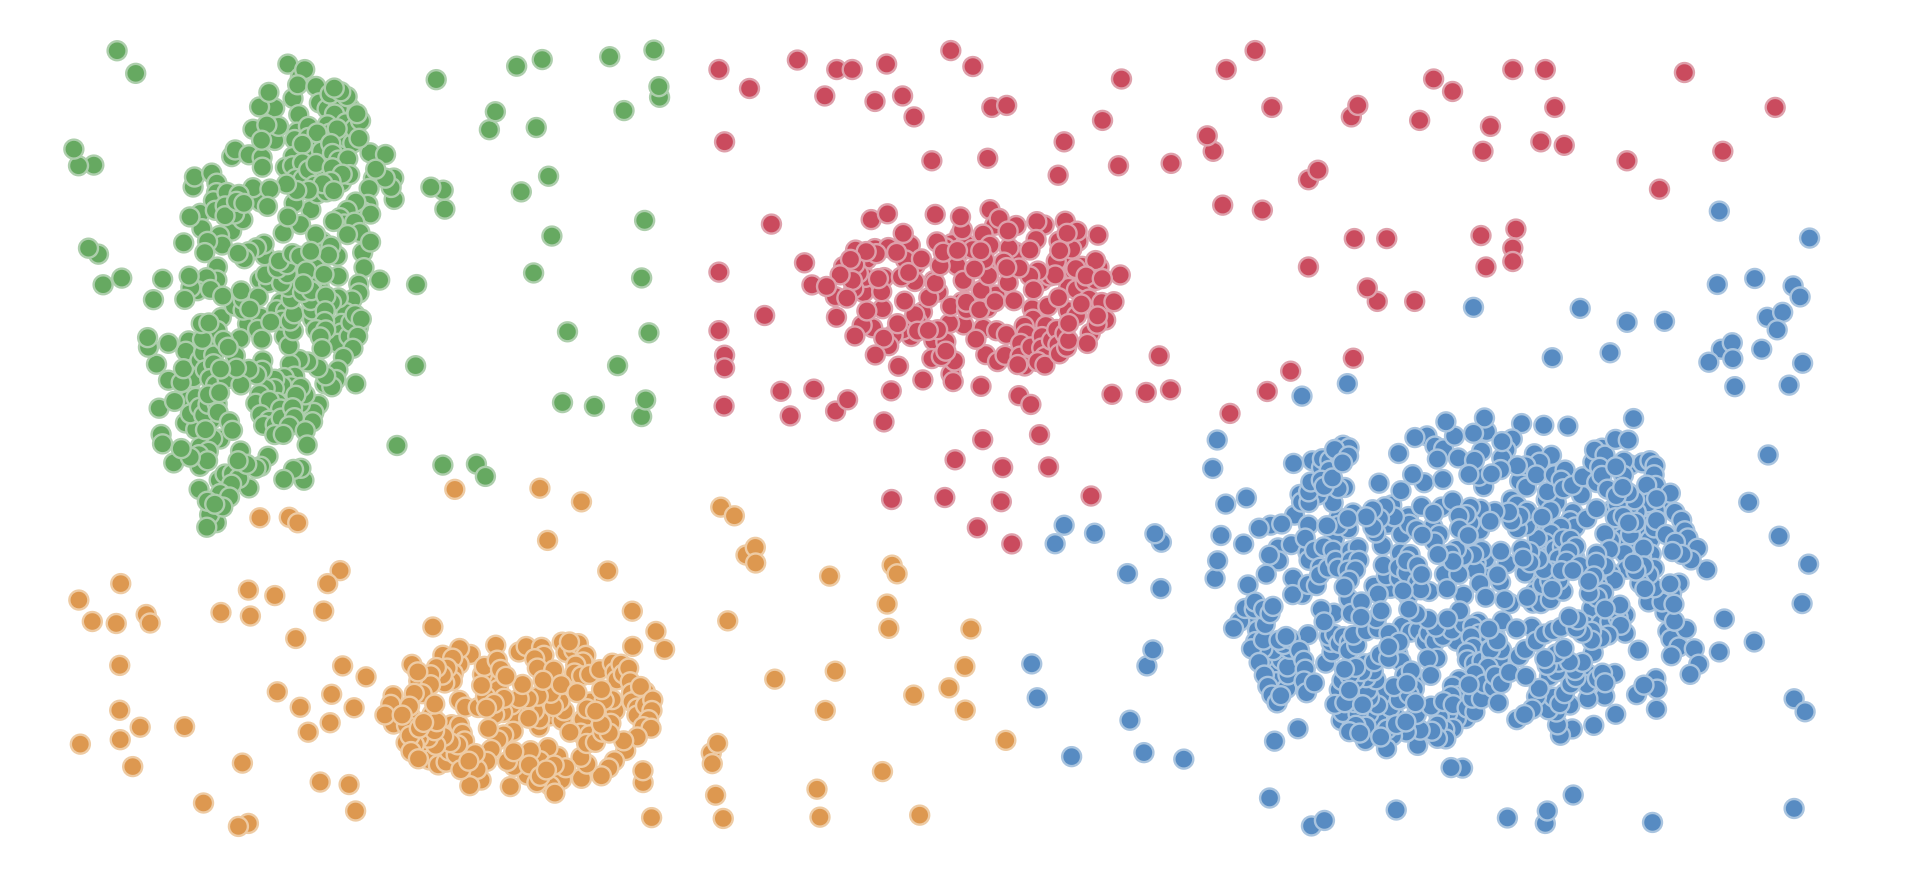

### Для чего нужна кластеризация?

Кластеризация широко применяется в машинном обучении для решения различного спектра задач:

* классификация (определение к какому классу относится каждый объект или же выделение новых классов, которые не были известны заранее)

* сегментация рынка (разделение потенциальных клиентов на группы по их характеристикам для разработки более эффективных стратегий в маркетинге и продажах)

* сегментация изображений (разделение изображения на сегменты или группы пикселей)

* кластеризация геоданных (группировка данных по их географическому расположению, например, разделение районов на безопасные и опасные, богатые и бедные, и так далее)

* понижение размерности (уменьшение количества признаков путем объединения схожих в один кластер)

* и другие...


По сути, кластеризацию можно выполнить везде, где нужно разделить данные на группы

### $K$-means

Алгоритм $k$-средних (k-means) — это один из самых популярных и простых методов кластеризации, который используется для разделения набора данных на $k$ групп (кластеров).

Основная идея заключается в итеративном обновлении позиции центров кластеров (*центроидов*) для каждого кластера на основе среднего арифметического расположенных в нём наблюдений и назначении наблюдений к ближайшим центроидам.



**Алгоритм $k$-средних** состоит из нескольких основных шагов:

1. *Выбор числа кластеров $k$*

    Пользователь заранее выбирает, на сколько кластеров нужно разделить данные. Например, если $k = 3$, данные будут разделены на три группы.

2. *Инициализация центроидов*

    Алгоритм случайным образом выбирает $k$ начальных точек в пространстве данных, которые называются центроидами. Эти точки будут начальными центрами кластеров.

3. *Назначение объектов кластерам*

    Каждый объект данных назначается к ближайшему центроиду. Близость обычно измеряется с помощью евклидова расстояния.

   Вспомним, что евклидово расстояние между точками $A(x_1, y_1)$ и $B(x_2, y_2)$ в двухмерном пространстве:

   $$
   d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
   $$

4. *Пересчёт центроидов*

    Для каждого кластера вычисляется новый центроид, который является средним значением всех точек, попавших в этот кластер. Этот новый центроид становится центром кластера.

   Если кластер $C$ состоит из точек $x_1, x_2, \dots, x_n$, то новый центроид $m$ вычисляется как:

   $$
   m = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$

5. *Повторение шагов 3-4*

    Шаги назначения объектов и пересчёта центроидов повторяются до тех пор, пока центроиды не перестанут изменяться или изменения будут минимальны. Это означает, что алгоритм нашёл устойчивое разбиение данных на кластеры.


После завершения итераций у вас будет $k$ кластеров, каждый из которых характеризуется своим центроидом, и объекты, распределённые по кластерам.

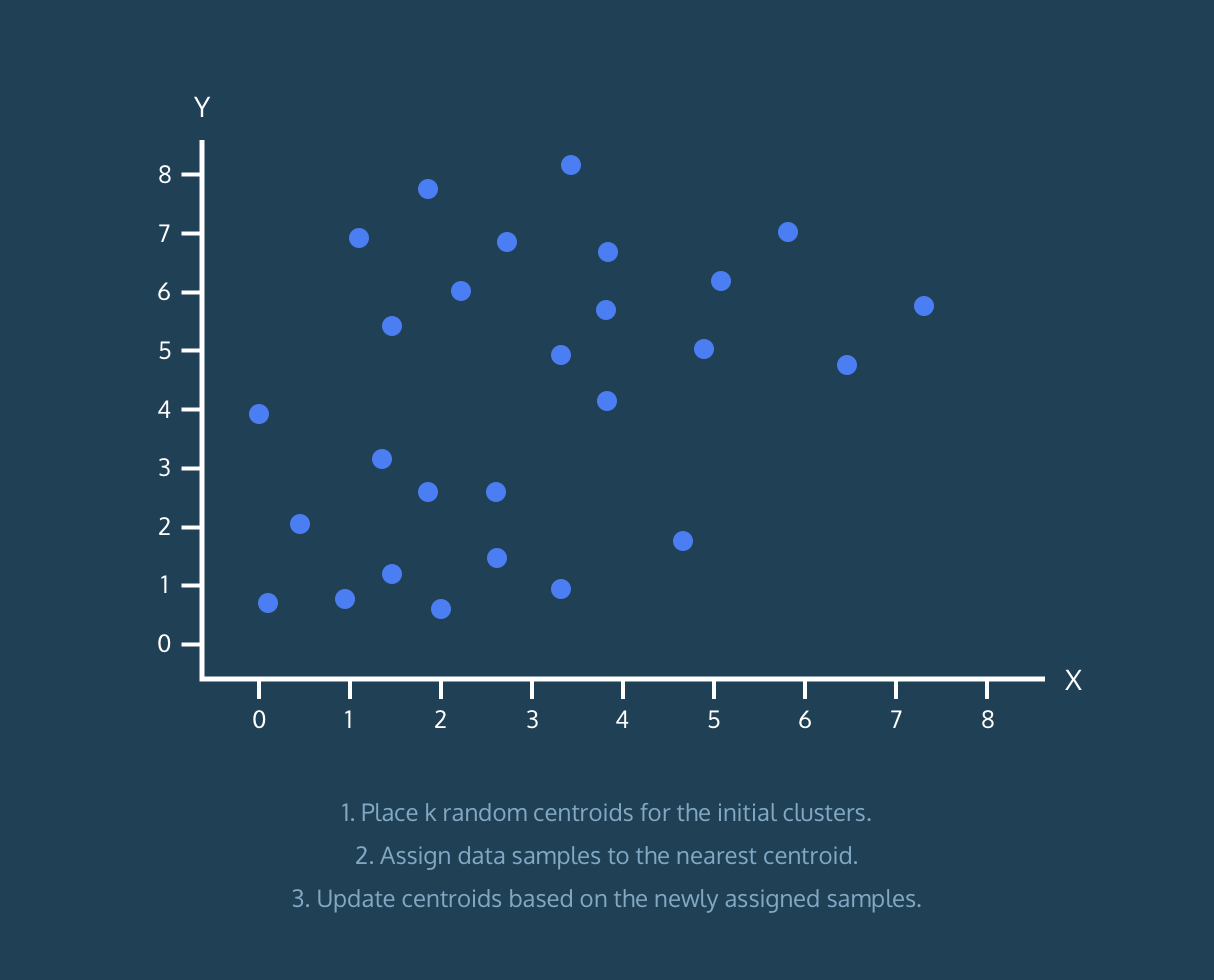

Источник: https://www.codecademy.com/learn/machine-learning-clustering-with-k-means/modules/ml-kmeans-clustering-course/cheatsheet

### Как применить $K$-means на практике?

Алгоритм кластеризации k-means реализован в библиотеке sklearn ([документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))

Давайте разделим такие данные на кластеры:

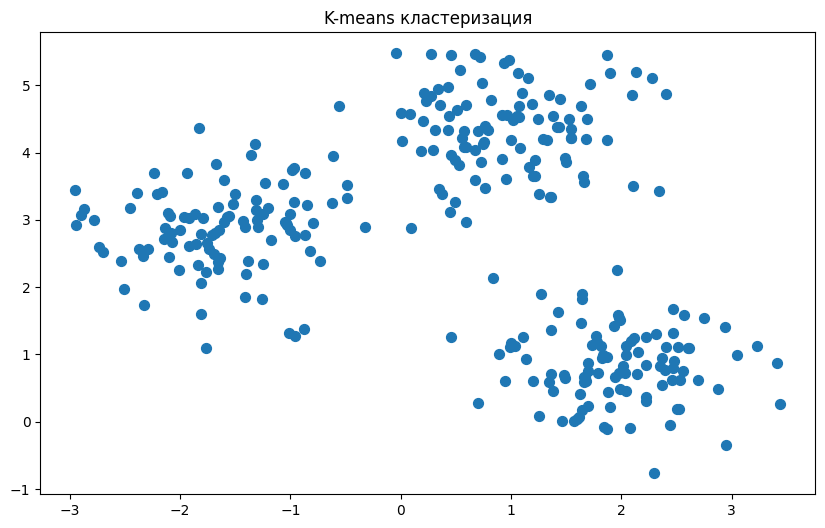

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Генерация синтетических данных с помощью make_blobs
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('K-means кластеризация')
plt.show()

Создадим объект KMeans и передадим ему число кластеров (три):

In [ ]:
from sklearn.cluster import KMeans

# Применение k-means с числом кластеров k=3
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(X)

# Получение меток кластеров
labels = kmeans.labels_

Визуализируем кластеры и покажем центроиды:

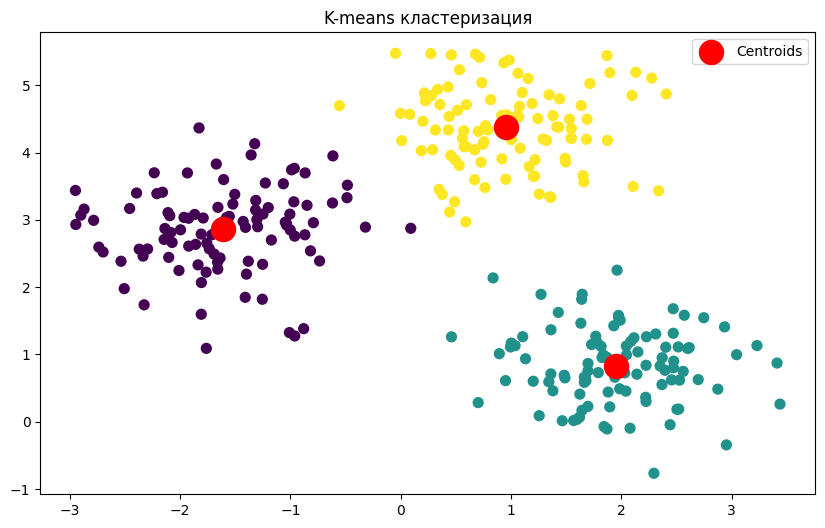

In [ ]:
# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Отображение центроидов кластеров
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means кластеризация')
plt.legend()
plt.show()

### Преимущества и недостатки $K$-means

**Преимущества**:
- Простота реализации и понимания.
- Быстрое выполнение на небольших и средних наборах данных.
- Эффективен для сферических кластеров (где объекты внутри кластеров образуют "шары" в пространстве).

**Недостатки**:
- Не гарантирует нахождение глобально оптимального решения (может застрять в локальном минимуме).
- Требует предварительного задания числа кластеров $k$.
- Чувствителен к выбору начальных центроидов (разные начальные центроиды могут привести к разным результатам).
- Плохо работает с кластерами сложной формы или с сильно разными размерами.

Алгоритм k-means не является лучшим алгоритмом, но достаточно прост для понимания и знакомства с задачей кластеризации. Существует много других алгоритмов, таких как DBSCAN, OPTICS, и другие, которые являются более продвинутыми, чем k-means. На этом занятии мы не будем о них говорить, но если вас заинтересовали эти алгоритмы, то можете изучить из отдельно.

### Как выбрать количество кластеров?

Как вы заметили, алгортим k-means имеет такой *гиперпараметр* как количество кластеров. То есть, перед запуском алгоритма мы должны заранее знать количество кластеров. Но как его узнать?

Существует несколько методов для выбора оптимального k: **метод локтя** и **метод силуэта**.

#### Метод локтя

Суть метода заключается в том, что мы вычисляем суммарное расстояние от каждой точки до её ближайшего центроида (внутрикластерная сумма квадратов) для разных значений $k$. Как правило, при увеличении числа кластеров эта сумма уменьшается, но после определённого значения $k$ уменьшение становится незначительным. Точка, где график перестаёт резко снижаться и начинает выравниваться, напоминает изгиб (локоть). Это и есть оптимальное число кластеров.

Пошаговое описание метода:

1. Запустите алгоритм $k$-means для разных значений $k$ (например, от 1 до 10).
2. Для каждого $k$ вычислите суммарное внутрикластерное расстояние (инерцию).
3. Постройте график, где на оси $x$ будет число кластеров $k$, а на оси $y$ — инерция.
4. Найдите "локоть" на графике — это и есть оптимальное число кластеров.

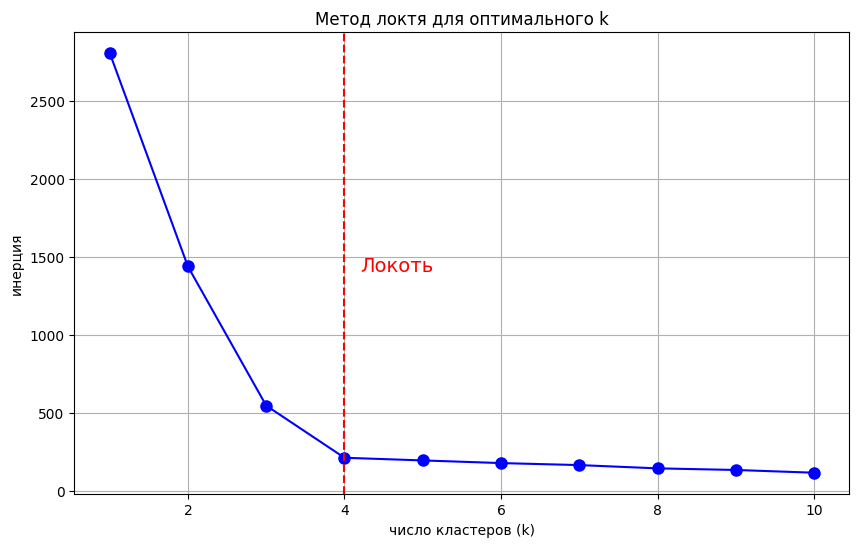

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Генерация синтетических данных
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Массив для хранения значений инерции
inertia = []

# Вычисление инерции для разных значений k
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)

# Добавление вертикальной пунктирной линии на x=4
plt.axvline(x=4, linestyle='--', color='red', label='Локоть')

# Добавление аннотации к линии "Локоть"
plt.text(4.2, max(inertia) // 2, 'Локоть', color='red', fontsize=14)

plt.xlabel('число кластеров (k)')
plt.ylabel('инерция')
plt.title('Метод локтя для оптимального k')

plt.grid(True)
plt.show()


#### Метод силуэта

Метод силуэта — это способ оценки качества кластеризации, который помогает определить, насколько хорошо каждый объект данных "вписывается" в свой кластер по сравнению с другими кластерами. Индекс силуэта измеряет, насколько точки внутри одного кластера ближе друг к другу по сравнению с точками из других кластеров. Он может варьироваться от -1 до 1, где значения, близкие к 1, указывают на хорошо определенные и четкие кластеры, а значения, близкие к -1, говорят о том, что точки данных, возможно, были отнесены не в тот кластер.

*Как рассчитывается индекс силуэта?*

1. Для каждого объекта данных:
   - Вычисляется среднее расстояние до всех точек в том же кластере (обозначим это значение $a$).
   - Вычисляется среднее расстояние до всех точек в ближайшем кластере, к которому объект не принадлежит (обозначим это значение $b$).
   
2. Индекс силуэта для каждого объекта рассчитывается по формуле:
   $$
   s = \frac{b - a}{\max(a, b)}
   $$
   где:
   - $s$ — индекс силуэта;
   - $a$ — среднее внутрикластерное расстояние;
   - $b$ — среднее межкластерное расстояние.

   Значение $s$ может варьироваться:
   - $s \approx 1$ — объект хорошо вписывается в свой кластер.
   - $s \approx 0$ — объект находится на границе между двумя кластерами.
   - $s \approx -1$ — объект может быть неправильно кластеризован.

Оптимальное количество кластеров: k=4


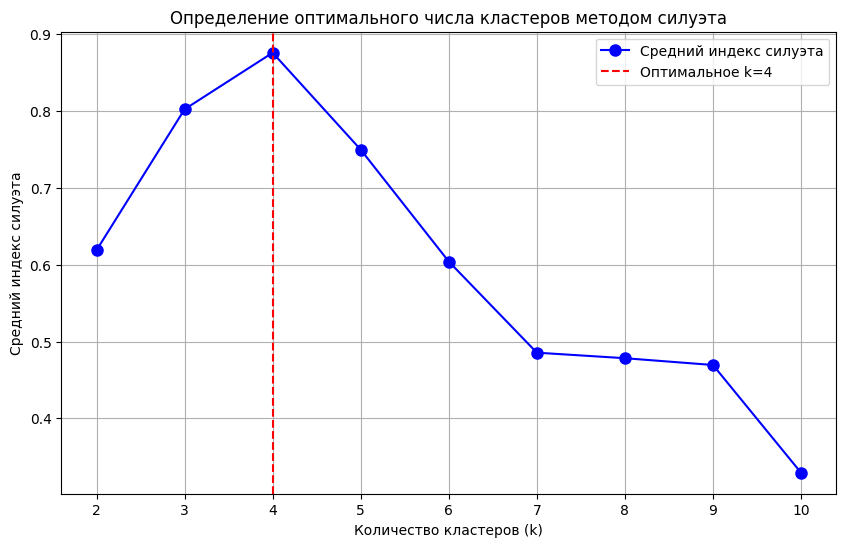

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Генерация синтетических данных
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# Диапазон значений k для оценки
range_n_clusters = range(2, 11)

# Массив для хранения средних значений силуэта
silhouette_avgs = []

# Поиск оптимального k
for n_clusters in range_n_clusters:
    # Применение k-means
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Вычисление среднего силуэта
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# Определение k с максимальным средним значением силуэта
optimal_k = range_n_clusters[silhouette_avgs.index(max(silhouette_avgs))]
print(f"Оптимальное количество кластеров: k={optimal_k}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avgs, 'bo-', markersize=8, label='Средний индекс силуэта')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Средний индекс силуэта')
plt.title('Определение оптимального числа кластеров методом силуэта')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Оптимальное k={optimal_k}')
plt.grid(True)
plt.legend()
plt.show()


### Иерархическая кластеризация

Иерархическая кластеризация — это метод группировки объектов данных, при котором создается иерархическая структура кластеров. В отличие от других методов, таких как $k$-means, где необходимо заранее задать количество кластеров, иерархическая кластеризация строит дерево кластеров (дендрограмму), которое можно "резать" на любом уровне, чтобы получить необходимое количество кластеров.

#### Виды иерархической кластеризации

Иерархическая кластеризация бывает двух основных типов:

1. **Агломеративная (снизу вверх)**:
   - Начинается с того, что каждый объект данных рассматривается как отдельный кластер.
   - Затем постепенно кластеры объединяются попарно, пока все они не объединятся в один кластер.
   - Этот процесс представлен в виде дерева (дендрограммы), где каждый уровень представляет собой объединение кластеров.
   
2. **Разделительная (сверху вниз)**:
   - В отличие от агломеративной, этот метод начинается с одного большого кластера, включающего все объекты данных.
   - Затем он постепенно делится на более мелкие кластеры, пока каждый объект не окажется в отдельном кластере.

#### Основные шаги агломеративной иерархической кластеризации

1. **Вычисление расстояний**:
   - Вначале вычисляется матрица расстояний между всеми парами объектов данных. В зависимости от задачи это может быть евклидово расстояние, манхэттенское расстояние и т.д.

2. **Объединение кластеров**:
   - На каждом шаге алгоритм объединяет два кластера с наименьшим расстоянием между ними.

3. **Обновление матрицы расстояний**:
   - После объединения двух кластеров необходимо обновить матрицу расстояний. Это можно сделать несколькими способами:
     - **Single linkage** (ближайший сосед): расстояние между двумя кластерами — это минимальное расстояние между любыми двумя точками из этих кластеров.
     - **Complete linkage** (дальний сосед): расстояние между двумя кластерами — это максимальное расстояние между любыми двумя точками из этих кластеров.
     - **Average linkage**: расстояние между двумя кластерами — это среднее расстояние между всеми парами точек из этих кластеров.
     - **Centroid linkage**: расстояние между двумя кластерами — это расстояние между их центроидами.

4. **Повторение**:
   - Процесс объединения кластеров и обновления матрицы расстояний повторяется, пока все кластеры не объединятся в один.

5. **Построение дендрограммы**:
   - В результате создается дендрограмма, которая визуально представляет процесс объединения кластеров и их иерархическую структуру.

#### Практическое использование агломеративной кластеризации

Для посотроения мы дендрограммы нам нужно вычислить матрицу расстояний с помощью [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) и нарисовать диаграмму с помощью [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html). Все это предоставляет библиотека scipy.

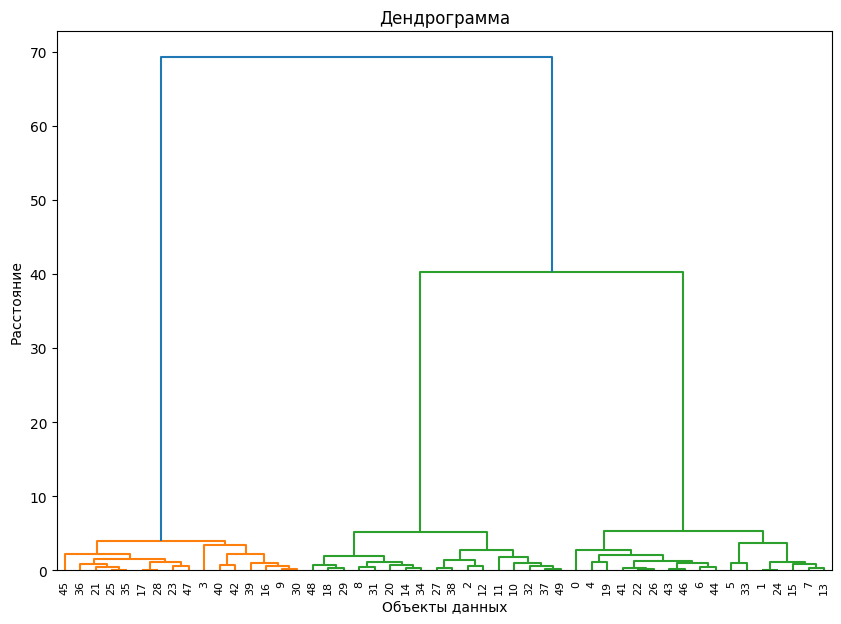

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Генерация синтетического набора данных
X, y = make_blobs(n_samples=50, centers=3, random_state=42)

# Выполнение агломеративной иерархической кластеризации
Z = linkage(X, method='ward')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма')
plt.xlabel('Объекты данных')
plt.ylabel('Расстояние')
plt.show()


На основе этой дендрограммы мы можем выбрать количество кластеров. Например, мы можем выбрать 3 кластера.

Чтобы выполнить саму агломеративную кластеризацию, мы можем использовать [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) из sklearn.

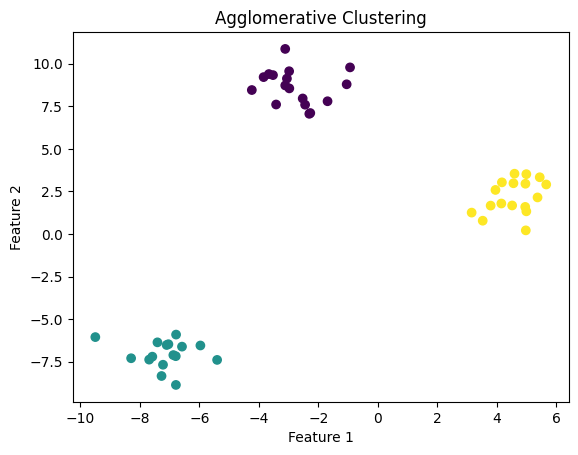

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Создание и применение AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Выполним K-means кластеризацию на признаках `petal_length` и `petal_width` датасета Iris. Для начала, загрузим данные из seaborn:

In [ ]:
import seaborn as sns

# Загрузка данных Iris из seaborn
iris = sns.load_dataset('iris')

# Используем только два признака для простоты визуализации
X = iris[['petal_length', 'petal_width']]
X

Попробуем найти оптимальное количество кластеров для K-means c помощью метода локтя:

In [ ]:
import matplotlib.pyplot as plt

# Импортируем KMeans из sklearn
...

# Диапазон возможных значений k
range_n_clusters = ...

# Список для хранения значений инерции
inertias = []

# Поиск оптимального k
for n_clusters in range_n_clusters:
    # Cоздание объекта KMeans
    kmeans = ...
    # Применение алгоритма KMeans
    ...
    # Добавление инерции в список
    inertias.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertias, 'bo-', markersize=8)
plt.xlabel('количество кластеров (k)')
plt.ylabel('инерция')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True)
plt.show()


Теперь выполним K-means кластеризацию с оптимальным количеством кластеров и визуализируем кластеры:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Создаем объест KMeans с оптимальным количеством кластеров
kmeans = ...
# Применяем алгоритм KMeans
...
# Записываем назначенные кластеры
iris['cluster'] = ...

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='cluster', palette='viridis', data=iris, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


## Метод ближайших соседей (KNN)

### Что такое метод ближайших соседей?


Метод ближайших соседей (англ. k-Nearest Neighbors, k-NN) — это один из простейших алгоритмов машинного обучения, который используется для предсказания класса или значения объекта. Он основывается на предположении, что объекты, которые находятся ближе друг к другу в пространстве признаков, имеют схожие характеристики.

Идея метода ближайших соседей заключается в следующем: для того чтобы предсказать класс или значение для нового объекта, необходимо найти $k$ ближайших к нему объектов из обучающей выборки и определить класс или значение на основе этих соседей.

knn-working.svg

### Для чего нужен метод ближайших соседей?

1. **Классификация**:
   - В этой задаче k-NN используется для определения класса нового объекта на основе классов его ближайших соседей.
   - Пример: Распознавание рукописных цифр (например, цифр на почтовом индексе). Для новой цифры алгоритм ищет самые близкие примеры в базе данных рукописных цифр и определяет класс цифры на основе большинства среди соседей.

2. **Регрессия**:
   - В задачи регрессии k-NN используется для предсказания численного значения на основе значений ближайших соседей.
   - Пример: Прогнозирование цены недвижимости. Чтобы предсказать цену нового дома, алгоритм находит дома с похожими характеристиками (площадь, количество комнат и т.д.) и вычисляет среднюю цену этих домов.

3. **Поиск**:
    - k-NN широко используется для поиска и сравнения объектов в базах данных. Например, для поиска изображений, документов или аудиофайлов, похожих на заданный образец.
    - Пример: Поиск по картинке в поисковых системах. Алгоритм находит изображения, похожие на загруженное пользователем, и возвращает наиболее близкие результаты.

4. **и другие задачи...**

### Алгоритм KNN

1. *Задание гиперпараметра $k$*
   
   Выбирается число ближайших соседей $k$. Это может быть любое положительное целое число, но чаще всего выбираются небольшие значения, например $k=3$ или $k=5$.

2. *Вычисление расстояния между объектами*
   
   Для того чтобы найти ближайших соседей, необходимо определить, как измерять "близость" объектов. Наиболее распространенный способ — использовать евклидово расстояние.

3. *Поиск $k$ ближайших соседей*
   
   Для каждого объекта в тестовом наборе данных определяются $k$ ближайших соседей среди объектов обучающей выборки. Это делается путем вычисления расстояния до каждого объекта в обучающей выборке и выбора $k$ ближайших.

4. *Классификация или регрессия*
   - Для задачи классификации объект присваивается тому классу, который является наиболее частым среди $k$ ближайших соседей. Например, если из $k$ соседей 3 относятся к классу "A", а 2 — к классу "B", то объект будет отнесен к классу "A".
   
   - Для задачи регрессии значение целевой переменной определяется как среднее значение целевой переменной среди $k$ ближайших соседей.

### Оптимизация алгоритма KNN

Упомянутый выше вариант алгоритма k-NN называется Brute-Force, так как для поиска ближайших соседей используется метод полного перебора. Это делает его простым в реализации, но крайне медленным при работе с большими объемами данных. Для улучшения производительности scikit-learn предлагает более эффективные методы, основанные на бинарных деревьях, которые обеспечивают значительный прирост скорости работы.

Чтобы ускорить поиск ближайших соседей, применяются специальные структуры данных:


**KD-Trees**

Это дерево, которое делит пространство признаков на $k$-мерные прямоугольники. Оно особенно эффективно для данных с небольшим числом признаков (обычно меньше 20). KD-деревья позволяют существенно сократить время поиска ближайших соседей по сравнению с наивным методом.

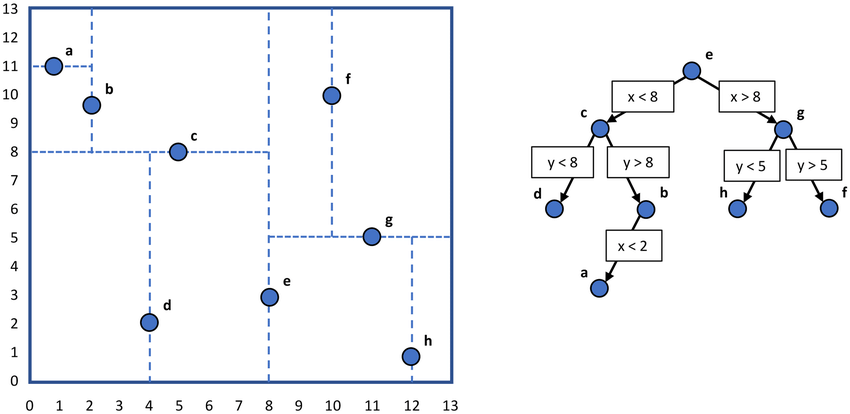

Источник: https://www.researchgate.net/figure/An-example-two-dimensional-k-d-tree-k-2-built-from-nodes-a-through-h-Dividing-planes_fig2_314298746

**Ball Trees**

Эти деревья используют сферы для разделения данных. Они могут быть более эффективными, чем KD-деревья, для данных с высоким числом признаков.

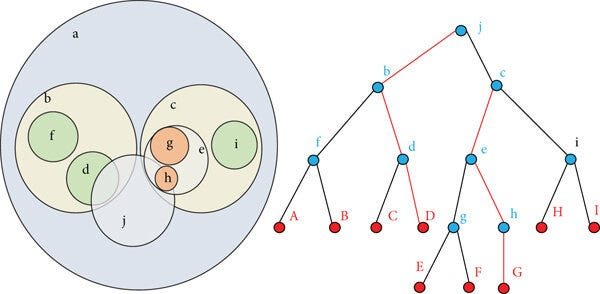

Источник: https://medium.com/@geethasreemattaparthi/ball-tree-and-kd-tree-algorithms-a03cdc9f0af9

### Применение KNN

Загрузим данные

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Загрузка датасета iris
iris = sns.load_dataset('iris')

# Разделение данных на обучающую и тестовую выборки
X = iris.drop('species', axis=1)
y = iris['species']

Для того, чтобы определить вид цветка мы можем использовать классификатор [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
# Создание объекта KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Применение модели KNN
knn.fit(X, y)

# Предсказание классов для тестовой выборки
test_indices = np.random.choice(iris.index, 10)
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]
y_pred = knn.predict(X_test)

In [ ]:
print("Предсказанные классы:")
print(y_pred.tolist())

print("Настоящие классы:")
print(y_test.values.tolist())

Предсказанные классы:
['versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa']
Настоящие классы:
['versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa']


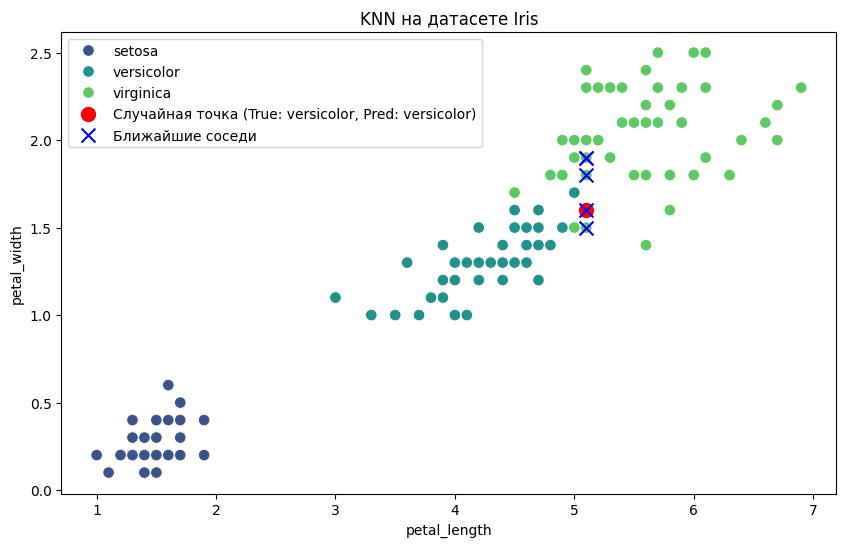

In [ ]:
# Выбор случайной точки из тестовой выборки
point = X_test.iloc[[0]]
true_label = y_test.iloc[0]
predicted_label = y_pred[0]

# Поиск ближайших соседей
distances, indices = knn.kneighbors(point)

# Визуализация результатов
plt.figure(figsize=(10, 6))

# График всех точек
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris, palette='viridis', s=70)

# # График случайной точки
plt.scatter(point['petal_length'], point['petal_width'], color='red', s=100, label=f'Случайная точка (True: {true_label}, Pred: {predicted_label})')

# График ближайших соседей
neighbors = X.iloc[indices[0]]
plt.scatter(neighbors['petal_length'], neighbors['petal_width'], color='blue', s=100, marker='x', label='Ближайшие соседи')

plt.title('KNN на датасете Iris')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

### Преимущества и недостатки k-NN


**Преимущества:**
- Простота в реализации и понимании.
- Нет необходимости в обучении модели (lazy learning), что позволяет использовать k-NN для больших объемов данных без долгой подготовки.

**Недостатки:**
- Может быть вычислительно затратным, особенно для больших данных, так как требует вычисления расстояния до всех точек обучающей выборки.
- Чувствителен к масштабу признаков, поэтому часто требуется нормализация данных.
- Чувствителен к выбору $k$. Слишком маленькое значение $k$ может привести к переобучению, слишком большое — к недообучению.


## Упражнение 2

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Попробуем предсказать смог ли выжить человек на Титанике. Для этого загрузим датасет и подготовим его:

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Загрузка датасета titanic
titanic = sns.load_dataset('titanic')

# Кодирование категориальных данных
label_encoders = {}
categorical_columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone', 'alive']

for column in categorical_columns:
    le = LabelEncoder()
    titanic[column] = le.fit_transform(titanic[column].astype(str))
    label_encoders[column] = le

# Удаление Nan
titanic = titanic.dropna(ignore_index=True)

# Разделение данных на признаки и классы
X = titanic.drop('alive', axis=1)
y = titanic['alive']

# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

Затем применим алгоритм KNN, чтобы понять, выжил ли человек на Титанике:

In [ ]:
# Создание объекта KNN
knn = ...

# Применение модели KNN
...

# Предсказание классов для тестовой выборки
test_indices = np.random.choice(len(X), 10)
X_test = X[test_indices]
y_test = y[test_indices]
y_pred = knn.predict(X_test)

print("Предсказанные классы:")
print(y_pred.tolist())

print("Настоящие классы:")
print(y_test.values.tolist())

## Заключение

В данном уроке мы рассмотрели два важных метода в области машинного обучения: кластеризацию и метод ближайших соседей (KNN). Кластеризация, представленная алгоритмом k-means, позволяет группировать данные на основе их сходства, что полезно для выявления структуры данных и сегментации. Метод ближайших соседей, с другой стороны, используется для классификации или регрессии новых данных на основе их близости к уже известным примерам.

## Источники

1. https://habr.com/ru/articles/798331/
2. https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F
3. https://habr.com/ru/articles/801885/